In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("BEABDatas/main.csv")

In [4]:
df

,datetime,BTC,ETH,ADA,BNB
0,2017-10-01,4403.09,303.95,0.02519,1.522
1,2017-10-02,4401.32,296.81,0.02588,1.973
2,2017-10-03,4314.18,291.81,0.02084,1.837
3,2017-10-04,4218.66,291.68,0.02189,1.622
4,2017-10-05,4321.44,294.99,0.02152,1.674
...,...,...,...,...,...
1255,2021-03-09,54928.70,1872.10,1.19900,293.650
1256,2021-03-10,55893.31,1795.63,1.13300,278.680
1257,2021-03-11,57809.41,1827.06,1.12500,290.150
1258,2021-03-12,57256.22,1767.77,1.03200,263.210


In [5]:
df = df.rename(columns={'datetime':'Date'})

In [7]:
df.dtypes

Date     object
BTC     float64
ETH     float64
ADA     float64
BNB     float64
dtype: object

In [19]:
#Setting Date column as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df = df.drop(['Date'],axis=1)

In [20]:
df

,BTC,ETH,ADA,BNB
2017-10-01,4403.09,303.95,0.02519,1.522
2017-10-02,4401.32,296.81,0.02588,1.973
2017-10-03,4314.18,291.81,0.02084,1.837
2017-10-04,4218.66,291.68,0.02189,1.622
2017-10-05,4321.44,294.99,0.02152,1.674
...,...,...,...,...
2021-03-09,54928.70,1872.10,1.19900,293.650
2021-03-10,55893.31,1795.63,1.13300,278.680
2021-03-11,57809.41,1827.06,1.12500,290.150
2021-03-12,57256.22,1767.77,1.03200,263.210


In [21]:
#Basic statistics on the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BTC,1260.0,10667.333722,8865.625031,3232.51000,6542.167500,8550.02500,10676.2175,60064.650
ETH,1260.0,397.635984,353.559695,84.12000,178.147500,253.54500,467.2800,1957.470
ADA,1260.0,0.149352,0.206434,0.01849,0.044498,0.08162,0.1455,1.319
BNB,1260.0,22.606944,35.000879,1.18200,10.280000,15.88500,23.2075,333.360


## Not Scaled Graph

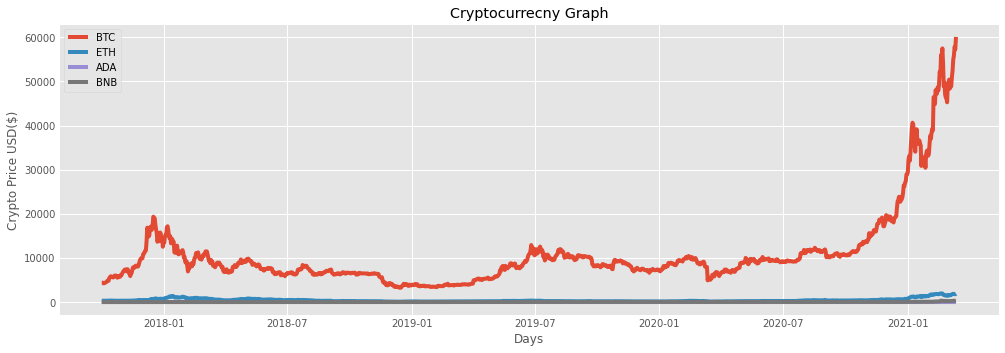

In [34]:
crypto_df = df
plt.figure(figsize=(15,5))
for c in crypto_df.columns.values:
    plt.plot(crypto_df[c],label=c)
    
plt.title('Cryptocurrecny Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Price USD($)')
plt.legend(crypto_df.columns.values,loc="upper left")

If we scale values, we can compare them neatly and get more information about their relation.
So to scale we need sklearn.preprocessing

In [25]:
from sklearn import preprocessing

In [26]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled = min_max_scaler.fit_transform(df)
scaled

array([[  2.0597148 ,  11.73459311,   0.51518251,   0.10235476],
       [  2.05660037,  11.35345771,   0.56823861,   0.23812534],
       [  1.90327163,  11.08655617,   0.18069834,   0.19718344],
       ...,
       [ 96.03175246,  93.03867403,  85.08277522,  86.99191397],
       [ 95.05837718,  89.87375557,  77.93173447,  78.88180433],
       [100.        ,  96.61035044,  85.23656104,  83.25295474]])

In [30]:
df_scaled = pd.DataFrame(scaled,columns = df.columns)
df_scaled = df_scaled.set_index(pd.DatetimeIndex(df.index))
df_scaled

,BTC,ETH,ADA,BNB
2017-10-01,2.059715,11.734593,0.515183,0.102355
2017-10-02,2.056600,11.353458,0.568239,0.238125
2017-10-03,1.903272,11.086556,0.180698,0.197183
2017-10-04,1.735198,11.079617,0.261436,0.132459
2017-10-05,1.916046,11.256306,0.232986,0.148113
...,...,...,...,...
2021-03-09,90.962948,95.442923,90.772851,88.045566
2021-03-10,92.660245,91.360931,85.697919,83.538946
2021-03-11,96.031752,93.038674,85.082775,86.991914
2021-03-12,95.058377,89.873756,77.931734,78.881804


## Scaled Graph

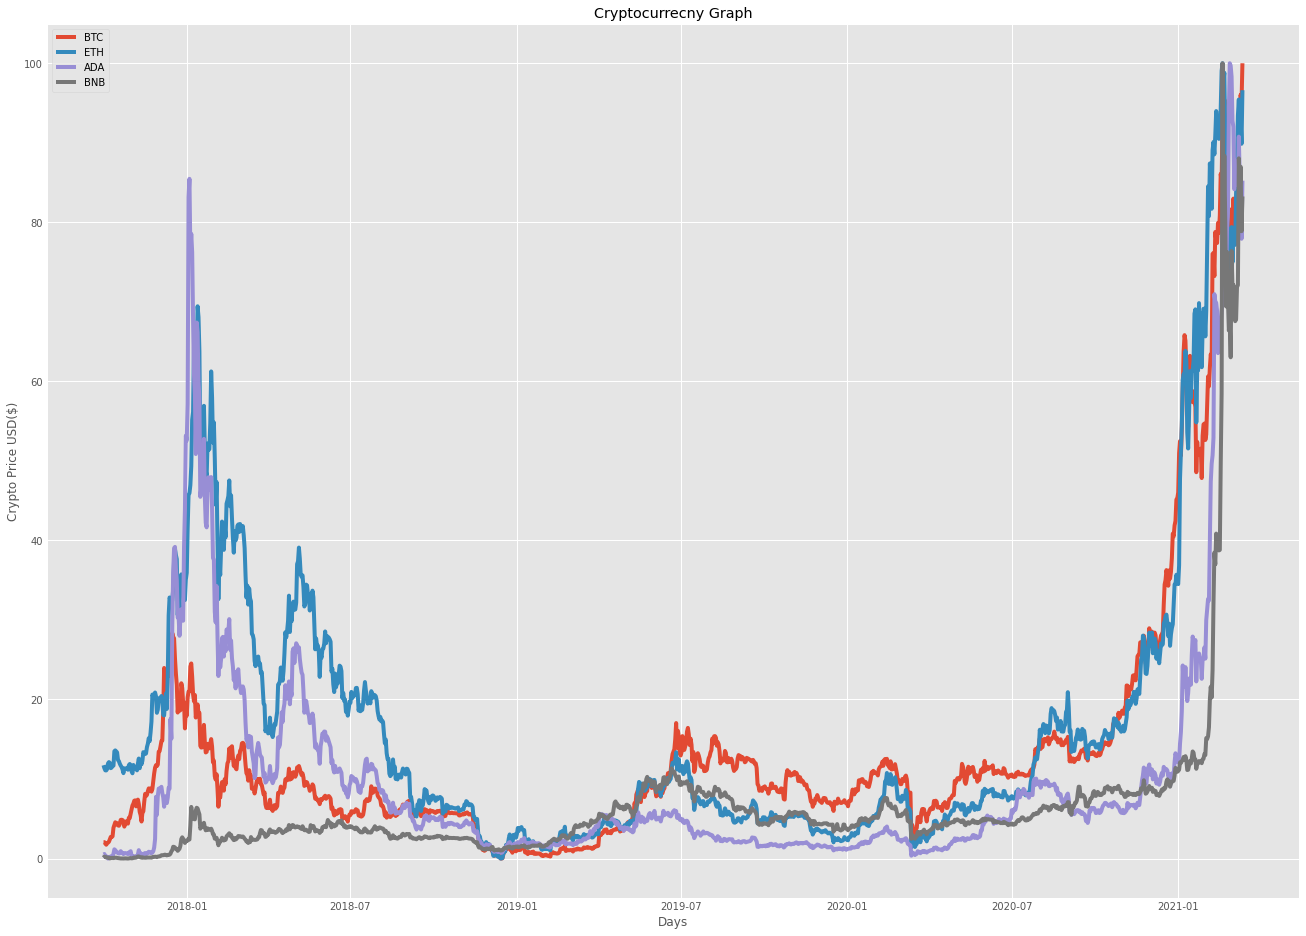

In [33]:
crypto_df = df_scaled
plt.figure(figsize=(20,15))
for c in crypto_df.columns.values:
    plt.plot(crypto_df[c],label=c)
    
plt.title('Cryptocurrecny Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Price USD($)')
plt.legend(crypto_df.columns.values,loc="upper left")

In [47]:
DSR = df.pct_change(7)
DSR

,BTC,ETH,ADA,BNB
2017-10-01,NaN,NaN,NaN,NaN
2017-10-02,NaN,NaN,NaN,NaN
2017-10-03,NaN,NaN,NaN,NaN
2017-10-04,NaN,NaN,NaN,NaN
2017-10-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-03-09,0.132522,0.257565,-0.021224,0.223644
2021-03-10,0.109158,0.144698,-0.067490,0.157405
2021-03-11,0.195305,0.187660,0.010782,0.263279
2021-03-12,0.173876,0.155594,-0.110345,0.166556


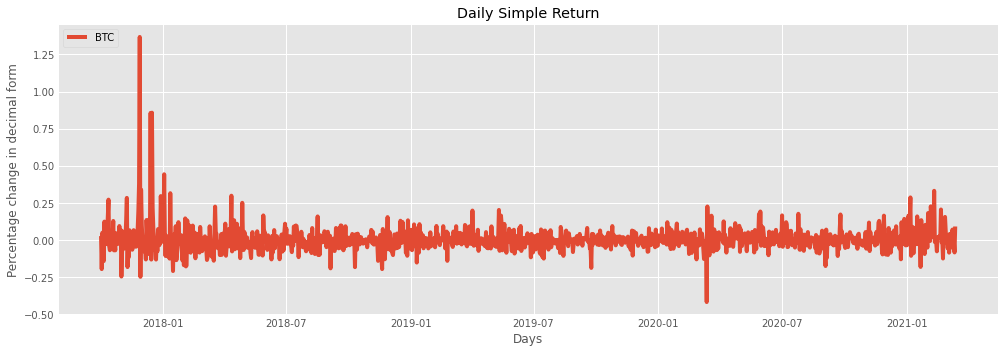

In [46]:
crypto_df = DSR
plt.figure(figsize=(15,5))

plt.plot(crypto_df['ADA'],label=None)
plt.title('Daily Simple Return')
plt.xlabel('Days')
plt.ylabel('Percentage change in decimal form')
plt.legend(crypto_df.columns.values,loc="upper left")
plt.show()